In [29]:
import requests
from requests.exceptions import HTTPError
import json
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [30]:
apikey='pk_51ec4f8f791544cea67f63da8a681e3e'

previous_day_url='https://cloud.iexapis.com/stable/stock/aapl/chart/1d?token='
previous_year_url='https://cloud.iexapis.com/stable/stock/aapl/chart/1y?token='
present_day_url='https://cloud.iexapis.com/stable/stock/aapl/intraday-prices/batch?token='

# We can get the price history of previous day, previous year or present day by just changing the url.

In [93]:
try:
    response = requests.get(previous_day_url+apikey)
    response.raise_for_status()
    # access JSOn content
    jsonResponse = response.json()
    print("Got Entire JSON response successfully")

except HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}')
except Exception as err:
    print(f'Other error occurred: {err}')
# Getting the data using requests library and our api key and url. If some http error or any other error occurs while retrieving the data, that is handeled

Got Entire JSON response successfully


In [42]:
open_prices=[]
date_times=[]
for single_response in jsonResponse:
  open_prices.append(single_response['open'])
  date_time=single_response['date']+" "+single_response['minute']
  date_time_obj = datetime.datetime.strptime(date_time, '%Y-%m-%d %H:%M')
  date_times.append(date_time_obj)
print(open_prices[:10])
print(date_times[0:10])
# Getting the openig prince and date and time and converting it into a timestamp format

[114.64, 114.56, 114.76, 114.65, 114.98, 114.91, 115.03, 114.935, 114.88, 114.9]
[datetime.datetime(2020, 10, 7, 9, 30), datetime.datetime(2020, 10, 7, 9, 31), datetime.datetime(2020, 10, 7, 9, 32), datetime.datetime(2020, 10, 7, 9, 33), datetime.datetime(2020, 10, 7, 9, 34), datetime.datetime(2020, 10, 7, 9, 35), datetime.datetime(2020, 10, 7, 9, 36), datetime.datetime(2020, 10, 7, 9, 37), datetime.datetime(2020, 10, 7, 9, 38), datetime.datetime(2020, 10, 7, 9, 39)]


In [51]:
stock_data=pd.DataFrame(data=list(zip(date_times,open_prices)),columns=['Date time','Opening Prices'])
stock_data
# Converting the data into a pandas dataframe

,Date time,Opening Prices
0,2020-10-07 09:30:00,114.640
1,2020-10-07 09:31:00,114.560
2,2020-10-07 09:32:00,114.760
3,2020-10-07 09:33:00,114.650
4,2020-10-07 09:34:00,114.980
...,...,...
385,2020-10-07 15:55:00,115.210
386,2020-10-07 15:56:00,115.120
387,2020-10-07 15:57:00,115.225
388,2020-10-07 15:58:00,115.160


In [52]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date time       390 non-null    datetime64[ns]
 1   Opening Prices  390 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.2 KB


In [86]:
X=[]
for a in stock_data['Date time']:
  X.append(a)
y=stock_data['Opening Prices'].values

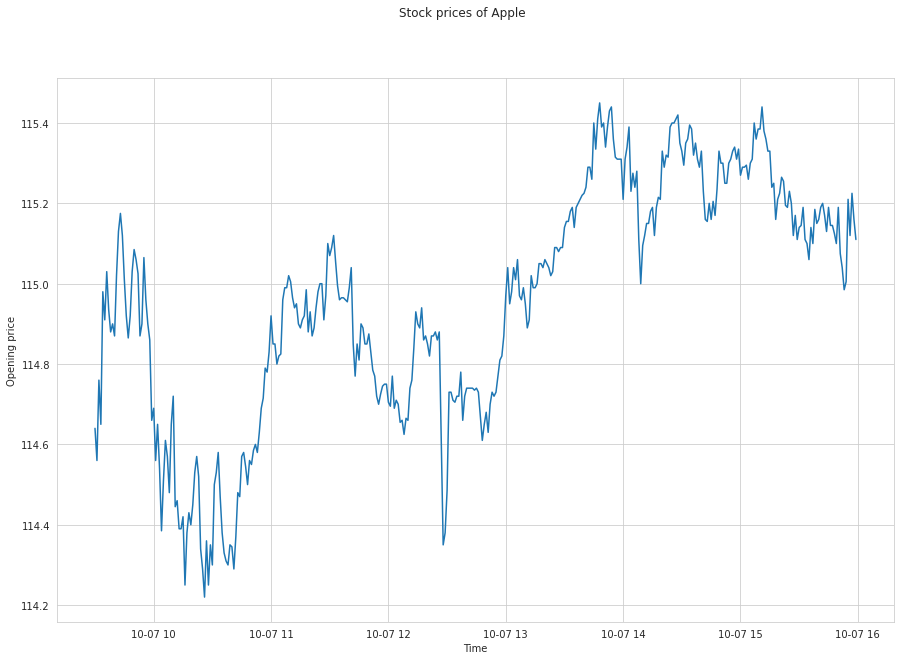

In [92]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.suptitle('Stock prices of Apple')
plt.plot(X,y)
# plt.gcf().autofmt_xdate()
plt.xlabel('Time')
plt.ylabel('Opening price')
plt.show()
# Plotting the data